# Project 3

- Leonardo Meireles
- Vitor Brisola

In [2]:
import networkx as nx

In [3]:
from numpy  import *
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [24]:
import json

## Utils

In [7]:
def get_largest_component(G,show = False):
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G=Gcc[0]
    # drawing largest component
    if show:
        print_net(G)
    return G

## Measures 

In [8]:
def get_degrees(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    degree = np.array(vk)
    return degree

In [9]:
def get_degree_distribution(G):
    vk = get_degrees(G)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [10]:
def momment_of_degree_distribution(G,m):
    k,Pk = get_degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

## Exercise 1) Comparison of Networks Models

In [11]:
def get_erdos_renyi(N,k):
    # k is the expected number of connections of the network
    # or the expected avarage degree
    p = k/(N-1)
    return nx.gnp_random_graph(N, p, seed=None, directed=False)

In [12]:
def get_watts_strogratz(N,k,p):
    k = int(k)
    #p = 0.01 #probability of rewiring
    return nx.watts_strogatz_graph(N, k, p, seed=None)

In [13]:
def get_barabasi_albert(N,k):
    m = int(k/2)
    return nx.barabasi_albert_graph(N, m)

In [14]:
def get_measures(G):
    measures = {}
    
    measures['number of nodes'                      ] = len(G.nodes())                        
    measures['average degree'                       ] = np.mean(G.degree())                   
    measures['second momment of degree distribution'] = momment_of_degree_distribution(G,2)   
    measures['average shortest path lenght'         ] = nx.average_shortest_path_length(G)    
    measures['average clustering coefficient'       ] = nx.average_clustering(G)              
    measures['transitivity'                         ] = nx.transitivity(G)                    
    measures['assortativity coefficient'            ] = nx.degree_assortativity_coefficient(G)
    
    return measures

In [15]:
N = 1000
k = 10

In [16]:
measure = {'number of nodes':[],'average degree':[],'second momment of degree distribution':[],
            'average shortest path lenght':[],'average clustering coefficient':[],'transitivity':[],
           'assortativity coefficient':[]}

In [43]:
nets_dir = 'nets/'
measures_dir = 'nets/measures/'

### Erdos-Rényi Model: Random Networks

In [23]:
# creating and saving networks
for i in range(0,30):
    # creating
    G = get_erdos_renyi(N,k)
    G = get_largest_component(G)
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    #saving
    nx.write_edgelist(G,nets_dir+str(i)+'_er.txt')
    G.clear()
    

In [61]:
er_measures = {}

In [62]:
for i in range(0,30):
    # reading network
    G = nx.read_edgelist(nets_dir+str(i)+'_er.txt')
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    # calculating measures
    m = get_measures(G)

    er_measures[i] = m
    
    G.clear()

In [63]:
for net in er_measures:
    with open(measures_dir+str(net)+'_er.json', 'w+') as outfile:
        json.dump(er_measures[net], outfile)

In [69]:
er_means_and_stds = {}
for net in er_measures:
    for measure in er_measures[net]:
        if net == 0: er_means_and_stds[measure] = []
        data = er_measures[net][measure]
        er_means_and_stds[measure].append(data)
        

In [70]:
for measure in er_means_and_stds:
    data = er_means_and_stds[measure]
    er_means_and_stds[measure] = {'mean':np.mean(data),'standart deviation':np.std(data)}

In [73]:
with open(measures_dir+'er_means_stds.json', 'w+') as outfile:
    json.dump(er_means_and_stds, outfile)

### Watts-Strogratz Model: Small-World Networks

In [32]:
# creating and saving networks
for i in range(0,30):
    # choosing p
    if i < 15: p = 0.1 
    else: p = 0.01
    # creatingb
    G = get_watts_strogratz(N,k,p)
    G = get_largest_component(G)
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    #saving
    nx.write_edgelist(G,nets_dir+str(i)+'_ws.txt')
    G.clear()
    

In [81]:
ws_measures = {}

In [83]:
for i in range(0,30):
    # reading network
    G = nx.read_edgelist(nets_dir+str(i)+'_ws.txt')
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    # calculating measures
    m = get_measures(G)

    ws_measures[i] = m
    
    G.clear()

In [84]:
for net in ws_measures:
    with open(measures_dir+str(net)+'_ws.json', 'w+') as outfile:
        json.dump(ws_measures[net], outfile)

In [85]:
ws_means_and_stds = {}
for net in ws_measures:
    for measure in ws_measures[net]:
        if net == 0: ws_means_and_stds[measure] = []
        data = ws_measures[net][measure]
        ws_means_and_stds[measure].append(data)
        

In [86]:
for measure in ws_means_and_stds:
    data = ws_means_and_stds[measure]
    ws_means_and_stds[measure] = {'mean':np.mean(data),'standart deviation':np.std(data)}

In [87]:
with open(measures_dir+'ws_means_stds.json', 'w+') as outfile:
    json.dump(ws_means_and_stds, outfile)

### Barabási-Albert Model: Scale-free Networks

In [88]:
# creating and saving networks
for i in range(0,30):
    # generating network
    G = get_barabasi_albert(N,k)
    G = get_largest_component(G)
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    #saving
    nx.write_edgelist(G,nets_dir+str(i)+'_ba.txt')
    G.clear()
    

In [89]:
ba_measures = {}

In [90]:
for i in range(0,30):
    # reading network
    G = nx.read_edgelist(nets_dir+str(i)+'_ba.txt')
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    # calculating measures
    m = get_measures(G)

    ba_measures[i] = m
    
    G.clear()

In [91]:
for net in ba_measures:
    with open(measures_dir+str(net)+'_ba.json', 'w+') as outfile:
        json.dump(ba_measures[net], outfile)

In [93]:
ba_means_and_stds = {}
for net in ba_measures:
    for measure in ba_measures[net]:
        if net == 0: ba_means_and_stds[measure] = []
        data = ba_measures[net][measure]
        ba_means_and_stds[measure].append(data)
        

In [94]:
for measure in ba_means_and_stds:
    data = ba_means_and_stds[measure]
    ba_means_and_stds[measure] = {'mean':np.mean(data),'standart deviation':np.std(data)}

In [95]:
with open(measures_dir+'ba_means_stds.json', 'w+') as outfile:
    json.dump(ws_means_and_stds, outfile)

### Table  Ploting

In [51]:
import plotly.graph_objects as go

In [113]:
with open(measures_dir+'er_means_stds.json') as json_file:
    er_means_and_stds = json.load(json_file)
with open(measures_dir+'ws_means_stds.json') as json_file:
    ws_means_and_stds = json.load(json_file)
with open(measures_dir+'ba_means_stds.json') as json_file:
    ba_means_and_stds = json.load(json_file)

In [114]:
#headers = dict(values=[header for header in ba_measures])
er_headers = dict(values = ['Erdos-Rényi Model'] + [header for header in er_means_and_stds['number of nodes']])
ws_headers = dict(values = ['Watts-Strogratz Model'] + [header for header in ws_means_and_stds['number of nodes']])
ba_headers = dict(values = ['Barabási-Albert Model'] + [header for header in er_means_and_stds['number of nodes']])

In [117]:
er_means = []
for measure in er_means_and_stds:
    er_means.append(er_means_and_stds[measure]['mean'])
ws_means = []
for measure in ws_means_and_stds:
    ws_means.append(ws_means_and_stds[measure]['mean'])
ba_means = []
for measure in ba_means_and_stds:
    ba_means.append(er_means_and_stds[measure]['mean'])

In [119]:
er_stds = []
for measure in er_means_and_stds:
    er_stds.append(er_means_and_stds[measure]['standart deviation'])
ws_stds = []
for measure in ws_means_and_stds:
    ws_stds.append(ws_means_and_stds[measure]['standart deviation'])
ba_stds = []
for measure in ba_means_and_stds:
    ba_stds.append(ba_means_and_stds[measure]['standart deviation'])

In [120]:
er_cells = dict(values=[[measure for measure in er_means_and_stds],
                     er_means,
                     er_stds])
ws_cells = dict(values=[[measure for measure in ws_means_and_stds],
                     ws_means,
                     ws_stds])
ba_cells = dict(values=[[measure for measure in ba_means_and_stds],
                     ba_means,
                     ba_stds])

In [121]:
er_fig = go.Figure(data=[go.Table(header=er_headers,
                 cells=er_cells)
                     ])
ws_fig = go.Figure(data=[go.Table(header=ws_headers,
                 cells=ws_cells)
                     ])
ba_fig = go.Figure(data=[go.Table(header=ba_headers,
                 cells=ba_cells)
                     ])
er_fig.show()
ws_fig.show()
ba_fig.show()


## Exercise 2) Erdös-Rényi network model

### Phase Transition Curve

In [123]:
N = 100
S = []
vk = []
for c in arange(0, 5, 0.05):
    p = c/(N-1)
    G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G=Gcc[0]
    S.append(len(G)/N)
    vk.append(c)
    #print(c, len(G))

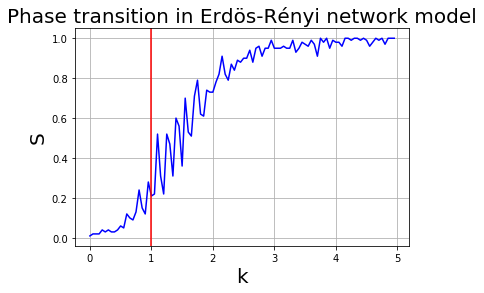

In [127]:
plt.figure()
plt.plot(vk,S,'b', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in Erdös-Rényi network model", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();

### Small World Property

In [132]:
def create_er_net(N,k):
    # creating
    G = get_erdos_renyi(N,k)
    G = get_largest_component(G)
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    #saving
    nx.write_edgelist(G,nets_dir+str(k)+'_'+str(N)+'_er_2.txt')
    return G

In [135]:
def er_read(N,k):
    G = nx.read_edgelist(nets_dir+str(k)+'_'+str(N)+'_er_2.txt')
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    return G

In [134]:
N = 100
while N <= 1000:
    for k in [4,10,20,30]:
        G = create_er_net(N,k)
        G.clear()
    N += 100

In [137]:
vk = []
short_l = []
N = 100
k = 4
while N <= 1000:
    G = er_read(N,k)
    l = nx.average_shortest_path_length(G)
    vk.append(N)
    short_l.append(l)
    N += 100

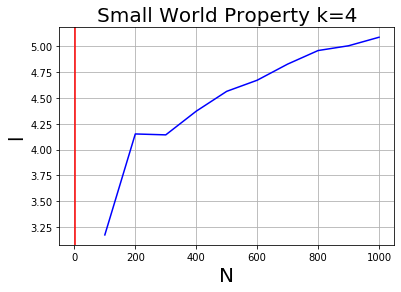

In [141]:
plt.figure()
plt.plot(vk,short_l,'b', label='Largest component size')
plt.xlabel("N", fontsize=20)
plt.ylabel("l", fontsize=20)
plt.title("Small World Property k="+str(k), fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();

In [142]:
vk = []
short_l = []
N = 100
k = 10
while N <= 1000:
    G = er_read(N,k)
    l = nx.average_shortest_path_length(G)
    vk.append(N)
    short_l.append(l)
    N += 100

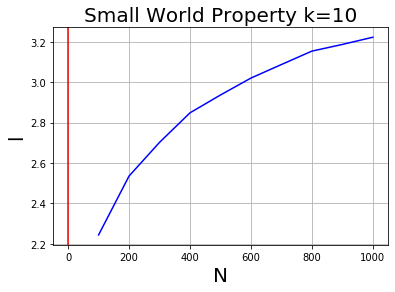

In [143]:
plt.figure()
plt.plot(vk,short_l,'b', label='Largest component size')
plt.xlabel("N", fontsize=20)
plt.ylabel("l", fontsize=20)
plt.title("Small World Property k="+str(k), fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();

In [144]:
vk = []
short_l = []
N = 100
k = 20
while N <= 1000:
    G = er_read(N,k)
    l = nx.average_shortest_path_length(G)
    vk.append(N)
    short_l.append(l)
    N += 100

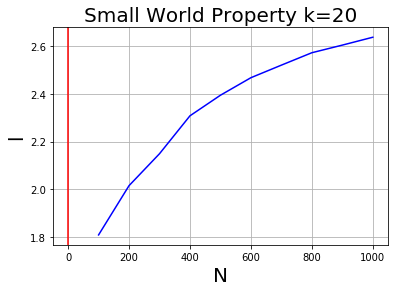

In [145]:
plt.figure()
plt.plot(vk,short_l,'b', label='Largest component size')
plt.xlabel("N", fontsize=20)
plt.ylabel("l", fontsize=20)
plt.title("Small World Property k="+str(k), fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();

In [146]:
vk = []
short_l = []
N = 100
k = 30
while N <= 1000:
    G = er_read(N,k)
    l = nx.average_shortest_path_length(G)
    vk.append(N)
    short_l.append(l)
    N += 100

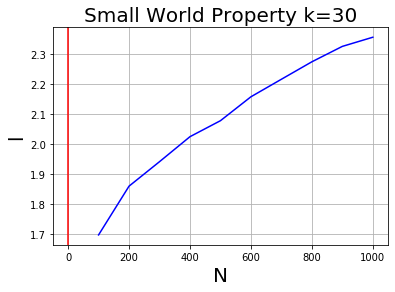

In [147]:
plt.figure()
plt.plot(vk,short_l,'b', label='Largest component size')
plt.xlabel("N", fontsize=20)
plt.ylabel("l", fontsize=20)
plt.title("Small World Property k="+str(k), fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show();